In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1. Exploratory Data Analysis

In [2]:
dataset = pd.read_csv("C:\\Users\\Asus\\Downloads\\datasetstroke.csv")
dataset

#id,ever_married, work_type, residence_type

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
print("Informasi dari Data")
dataset.info()

Informasi dari Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
#mencari missing value
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
target = 'stroke'
dataset[target].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

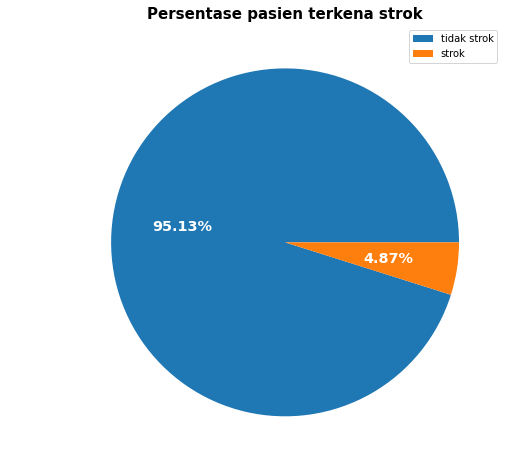

In [7]:
plt.figure(figsize = (10, 8))
plt.pie(pd.value_counts(dataset['stroke']), 
        labels = ['tidak strok','strok'],
        autopct = '%.2f%%',
        textprops = {'size' : 'x-large',
                     'fontweight' : 'bold', 
                     'rotation' : '0',
                     'color' : 'w'})

plt.legend()
plt.title('Persentase pasien terkena strok', fontsize = 15, fontweight = 'bold')
plt.show()

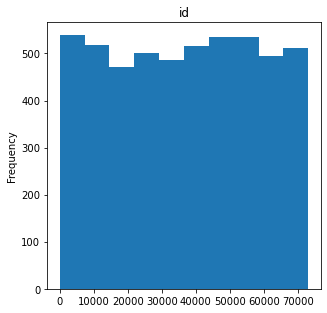

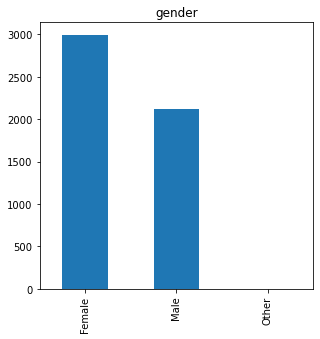

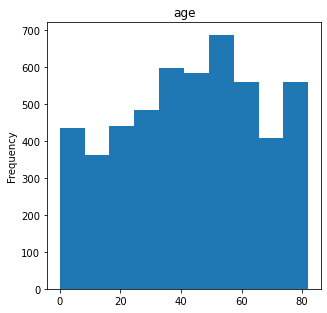

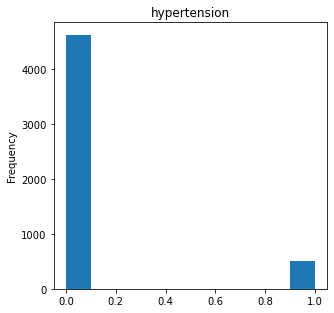

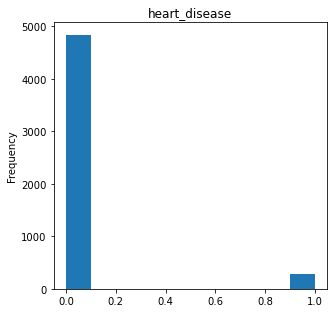

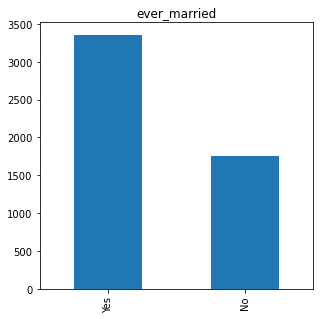

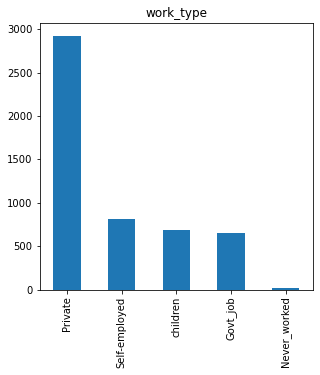

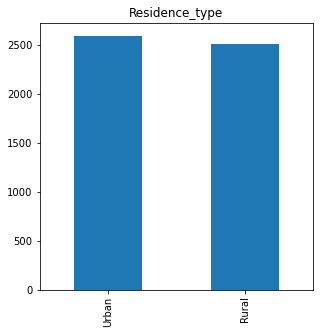

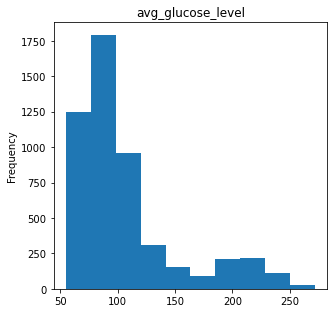

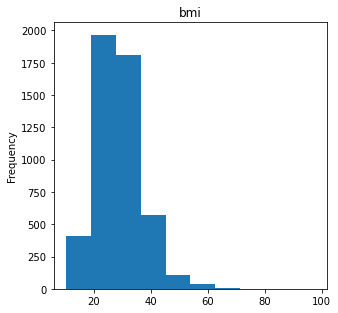

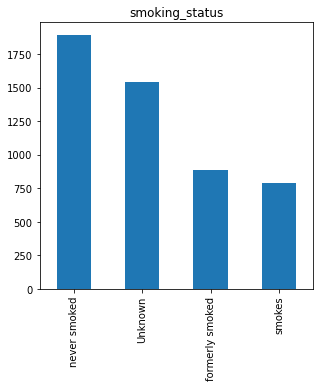

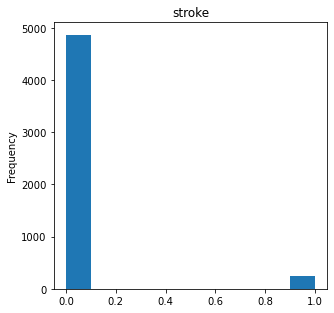

In [8]:
from pandas.api.types import is_string_dtype, is_numeric_dtype
# bar chart and histogram
for column in dataset:
    plt.figure(column, figsize = (4.9,4.9))
    plt.title(column)
    if is_numeric_dtype(dataset[column]):
        dataset[column].plot(kind = 'hist')
    elif is_string_dtype(dataset[column]):
 # show only the TOP 10 value count in each categorical data
        dataset[column].value_counts()[:10].plot(kind = 'bar')

Mencari korelasi antar variabel

<AxesSubplot:>

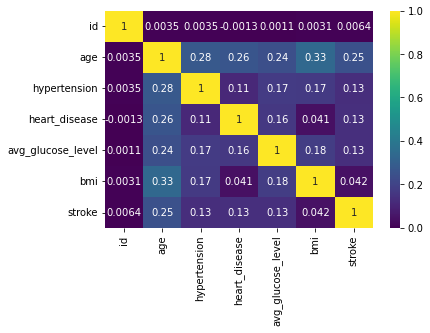

In [9]:
sns.heatmap(dataset.corr(), annot = True, cmap = 'viridis')

# Data Preprocessing

1. Data Cleaning

In [10]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
x = dataset['bmi'].mean()
dataset['bmi'].fillna(x,inplace = True)

In [12]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
dataset.drop(["id","ever_married","work_type","Residence_type"],axis=1, inplace=True)

In [14]:
dataset

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,171.23,34.400000,smokes,1
4,Female,79.0,1,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,166.29,25.600000,formerly smoked,0


# Transformation Data

In [15]:
dataset

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,171.23,34.400000,smokes,1
4,Female,79.0,1,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,166.29,25.600000,formerly smoked,0


atribut gender 
male = 0
female = 1

atribut smoking status

formerly smoked = 0


smokes = 1


never smokes = 2


Unknown = 3


atribut residence_type


Urban = 0


Rural = 1


atribut ever_married


No = 0 


Yes = 1


atribut work_type


Private = 0


Self-Employed = 1


Govt_job = 2


children = 3


Never_worked = 4


In [16]:
#transformation data
#gender
for y in dataset.index:
  while dataset.loc[y, "gender"] == 'Male':
        dataset.loc[y, "gender"] = 0
  while dataset.loc[y, "gender"] == 'Female':
        dataset.loc[y, "gender"] = 1
  while dataset.loc[y, "gender"] == 'Other':
        dataset.loc[y, "gender"] = 2

In [17]:
#transofrmation data
#smoking status
for y in dataset.index:
  while dataset.loc[y, "smoking_status"] == 'formerly smoked':
        dataset.loc[y, "smoking_status"] = 0
  while dataset.loc[y, "smoking_status"] == 'smokes':
        dataset.loc[y, "smoking_status"] = 1
  while dataset.loc[y, "smoking_status"] == 'never smoked':
        dataset.loc[y, "smoking_status"] = 2
  while dataset.loc[y, "smoking_status"] == 'Unknown':
        dataset.loc[y, "smoking_status"] = 3

In [18]:
dataset

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,228.69,36.600000,0,1
1,1,61.0,0,0,202.21,28.893237,2,1
2,0,80.0,0,1,105.92,32.500000,2,1
3,1,49.0,0,0,171.23,34.400000,1,1
4,1,79.0,1,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,83.75,28.893237,2,0
5106,1,81.0,0,0,125.20,40.000000,2,0
5107,1,35.0,0,0,82.99,30.600000,2,0
5108,0,51.0,0,0,166.29,25.600000,0,0


# Undersampling Data

In [19]:
X=dataset.drop("stroke",axis=1)
y=dataset.stroke

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [21]:
from collections import Counter
print(Counter(X))
print(Counter(y))

Counter({'gender': 1, 'age': 1, 'hypertension': 1, 'heart_disease': 1, 'avg_glucose_level': 1, 'bmi': 1, 'smoking_status': 1})
Counter({0: 4861, 1: 249})


In [22]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss()
X_train_ns,y_train_ns=ns.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of dataset after fit {}".format(Counter(X_train_ns)))
print("The number of stroke after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 3892, 1: 196})
The number of dataset after fit Counter({'gender': 1, 'age': 1, 'hypertension': 1, 'heart_disease': 1, 'avg_glucose_level': 1, 'bmi': 1, 'smoking_status': 1})
The number of stroke after fit Counter({0: 249, 1: 249})


In [23]:
y_train_ns

0      0
1      0
2      0
3      0
4      0
      ..
493    1
494    1
495    1
496    1
497    1
Name: stroke, Length: 498, dtype: int64

In [24]:
y_train_ns.value_counts()

0    249
1    249
Name: stroke, dtype: int64

<AxesSubplot:>

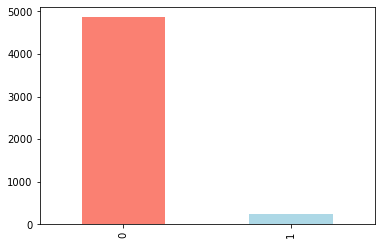

In [25]:
y.value_counts().plot(kind="bar",color=["salmon","lightblue"])

<AxesSubplot:>

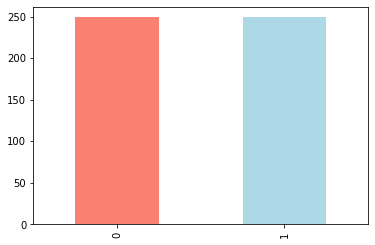

In [26]:
y_train_ns.value_counts().plot(kind="bar",color=["salmon","lightblue"])

# Modelling & Evaluation

In [27]:
X = X_train_ns
Y = y_train_ns

In [28]:
print(X)
print(Y)

    gender   age  hypertension  heart_disease  avg_glucose_level        bmi  \
0      1.0  80.0             0              0              72.61  27.600000   
1      1.0  79.0             1              0              74.00  29.600000   
2      1.0  80.0             0              0              71.88  26.700000   
3      1.0  80.0             0              0              72.71  29.900000   
4      0.0  78.0             0              0              74.70  28.800000   
..     ...   ...           ...            ...                ...        ...   
493    0.0  57.0             0              0              84.96  36.700000   
494    1.0  14.0             0              0              57.93  30.900000   
495    1.0  75.0             0              0              78.80  29.300000   
496    0.0  71.0             1              0              87.80  28.893237   
497    1.0  78.0             0              0              78.81  19.600000   

    smoking_status  
0              2.0  
1        

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [74]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [75]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=10)
classifier.fit(X_train, Y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[43  6]
 [19 32]]


0.75

In [76]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77        49
           1       0.84      0.63      0.72        51

    accuracy                           0.75       100
   macro avg       0.77      0.75      0.75       100
weighted avg       0.77      0.75      0.75       100



In [78]:
import tensorflow as tf

tf.Tensor(
[[43  6]
 [19 32]], shape=(2, 2), dtype=int32)


Text(69.0, 0.5, 'Prediksi Strok, 0: Tidak/1: Iya')

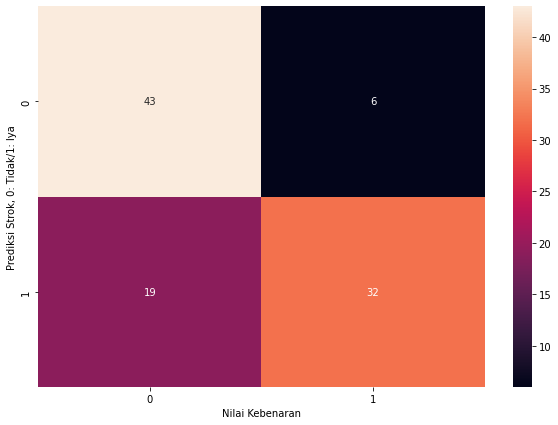

In [80]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_pred)

print(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Nilai Kebenaran')
plt.ylabel('Prediksi Strok, 0: Tidak/1: Iya')

In [337]:
X = X_train_ns
Y = y_train_ns

In [338]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [339]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [340]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=10)
classifier.fit(X_train, Y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[25  1]
 [ 7 17]]


0.84

In [341]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        26
           1       0.94      0.71      0.81        24

    accuracy                           0.84        50
   macro avg       0.86      0.83      0.84        50
weighted avg       0.86      0.84      0.84        50



tf.Tensor(
[[25  1]
 [ 7 17]], shape=(2, 2), dtype=int32)


Text(69.0, 0.5, 'Prediksi Strok, 0: Tidak/1: Iya')

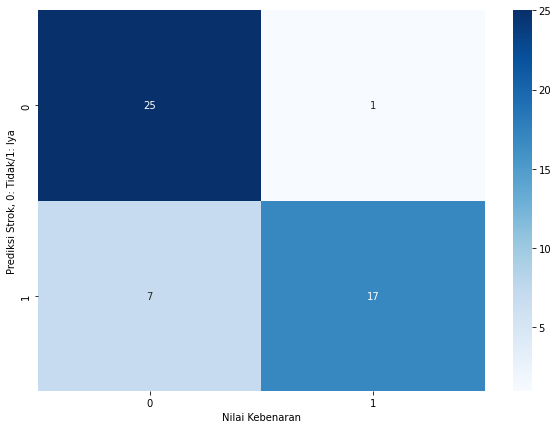

In [346]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_pred)

print(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Nilai Kebenaran')
plt.ylabel('Prediksi Strok, 0: Tidak/1: Iya')

Akurasi yang didapat dr SVM sebesar 95.38% (sebelum Undersampling Data)

# Akurasi yang didapat dr SVM sebesar 72%

In [33]:
#RandomSearch CV (Hyperparameter Tuning)
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'kernel': ['rbf', 'sigmoid'],
              'C': np.logspace(-3, 5, 17),
              'gamma': np.logspace(-3, 5, 17)}
grid = RandomizedSearchCV(classifier, param_grid,cv=10, random_state = 0)
grid.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, estimator=SVC(random_state=10),
                   param_distributions={'C': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05]),
                                        'gamma': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05]),
                                        'kernel': ['rbf', 'sigmoid']},
                   random_state=0)

In [34]:
# print best parameter after tuning
#print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)
#from sklearn.metrics import confusion_matrix, accuracy_score
#y_pred = classifier.predict(X_test)
#cm = confusion_matrix(Y_test, Y_pred)
#print(cm)
#accuracy_score(Y_test, Y_pred)

#SVM lumayan memakan waktu

# Decision Tree

In [851]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [910]:
X_trainset, X_testset, Y_trainset, Y_testset=train_test_split(X, Y, test_size=0.1)

X_trainset.shape, X_testset.shape, Y_testset.shape, Y_trainset.shape

((448, 7), (50, 7), (50,), (448,))

In [911]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainset = sc.fit_transform(X_trainset)
X_testset = sc.fit_transform(X_testset)

In [912]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='entropy')
model2.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(criterion='entropy')

In [913]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_prediction = model2.predict(X_testset)
cm = confusion_matrix(Y_testset, Y_prediction)
print(cm)
accuracy_score(Y_testset, Y_prediction)

[[21  7]
 [ 6 16]]


0.74

In [914]:
from sklearn.metrics import classification_report
print(classification_report(Y_testset,Y_prediction))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.70      0.73      0.71        22

    accuracy                           0.74        50
   macro avg       0.74      0.74      0.74        50
weighted avg       0.74      0.74      0.74        50



tf.Tensor(
[[21  7]
 [ 6 16]], shape=(2, 2), dtype=int32)


Text(69.0, 0.5, 'Prediksi Strok, 0: Tidak/1: Iya')

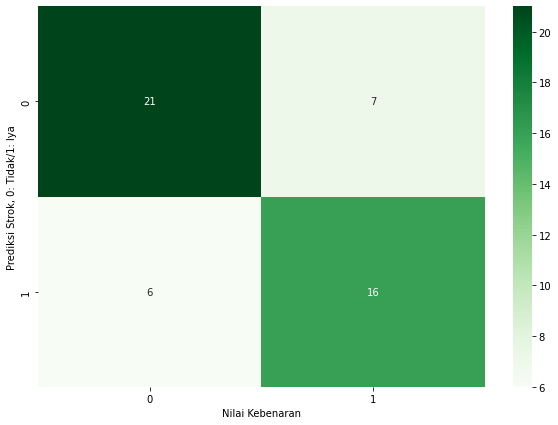

In [916]:
cm = tf.math.confusion_matrix(labels=Y_testset,predictions=Y_prediction)

print(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Nilai Kebenaran')
plt.ylabel('Prediksi Strok, 0: Tidak/1: Iya')

In [889]:
X_trainset, X_testset, Y_trainset, Y_testset=train_test_split(X, Y, test_size=0.2)

X_trainset.shape, X_testset.shape, Y_testset.shape, Y_trainset.shape

((398, 7), (100, 7), (100,), (398,))

In [890]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainset = sc.fit_transform(X_trainset)
X_testset = sc.fit_transform(X_testset)

In [891]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='entropy')
model2.fit(X_trainset,Y_trainset)
Y_prediction = model2.predict(X_testset)
cm = confusion_matrix(Y_testset, Y_prediction)
print(cm)
accuracy_score(Y_testset, Y_prediction)

[[37 15]
 [15 33]]


0.7

In [892]:
from sklearn.metrics import classification_report
print(classification_report(Y_testset,Y_prediction))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        52
           1       0.69      0.69      0.69        48

    accuracy                           0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.70      0.70      0.70       100



tf.Tensor(
[[37 15]
 [15 33]], shape=(2, 2), dtype=int32)


Text(69.0, 0.5, 'Prediksi Strok, 0: Tidak/1: Iya')

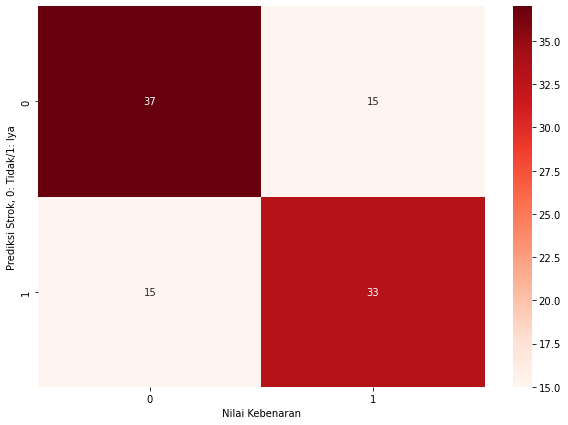

In [895]:
cm = tf.math.confusion_matrix(labels=Y_testset,predictions=Y_prediction)

print(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Nilai Kebenaran')
plt.ylabel('Prediksi Strok, 0: Tidak/1: Iya')

In [879]:
#Stratified Crossvalidation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=15, shuffle=True)
model2 = DecisionTreeClassifier(criterion='entropy', max_depth= 5)
scores = cross_val_score(model2, X, Y, cv= skfold)
print(np.mean(scores))

0.6868686868686869


In [876]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='entropy')
model2.fit(X_trainset,Y_trainset)

DecisionTreeClassifier(criterion='entropy')

Akurasi yang didapat menggunakan Decision Tree sebesar 95%

In [41]:
model2.fit(X_trainset, Y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

Plotting the tree

[Text(0.6375, 0.9166666666666666, 'x[4] <= -0.041\nentropy = 1.0\nsamples = 448\nvalue = [222, 226]'),
 Text(0.375, 0.75, 'x[5] <= 1.648\nentropy = 0.957\nsamples = 327\nvalue = [203, 124]'),
 Text(0.325, 0.5833333333333334, 'x[4] <= -0.767\nentropy = 0.942\nsamples = 317\nvalue = [203, 114]'),
 Text(0.2, 0.4166666666666667, 'x[5] <= -0.095\nentropy = 0.996\nsamples = 52\nvalue = [24, 28]'),
 Text(0.1, 0.25, 'x[2] <= 0.721\nentropy = 0.918\nsamples = 30\nvalue = [20, 10]'),
 Text(0.05, 0.08333333333333333, 'entropy = 0.738\nsamples = 24\nvalue = [19, 5]'),
 Text(0.15, 0.08333333333333333, 'entropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.3, 0.25, 'x[5] <= 0.003\nentropy = 0.684\nsamples = 22\nvalue = [4, 18]'),
 Text(0.25, 0.08333333333333333, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.35, 0.08333333333333333, 'entropy = 0.89\nsamples = 13\nvalue = [4, 9]'),
 Text(0.45, 0.4166666666666667, 'x[4] <= -0.746\nentropy = 0.909\nsamples = 265\nvalue = [179, 86]'),
 Text(0.4

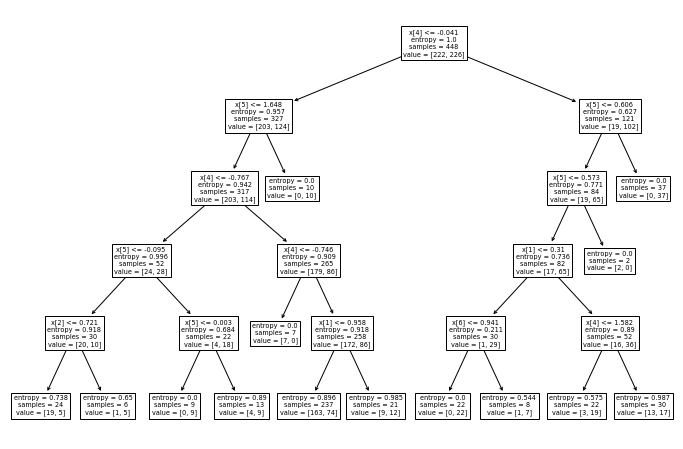

In [42]:
from sklearn import tree
plt.figure(figsize=(12,8))

tree.plot_tree(model2.fit(X_trainset, Y_trainset)) 

from sklearn import tree
import graphviz
dt_feature_names = dataset.columns  
dot_data = tree.export_graphviz(model2, 
                              feature_names=dt_feature_names,  
                              class_names= np.unique(Y_trainset), filled=True, rounded = True)

graph = graphviz.Source(dot_data) 
graph

#Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier , X=X_train , y=Y_train , cv=10)
print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))